# Query 1

### Import Statements and loading CSV into Pandas

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
output = pd.read_csv('SQLOutput115.csv')
output


,SchoolName,Cost,CourseID,UCBoolean,PercentStem,NumStudents
0,New York University,6285,4123,0,0.32,51123
1,Ohio State University,17277,434,0,0.22,66444
2,San Jose City College,8000,6931,0,0.39,14385
3,San Jose State University,11077,234,0,0.12,32773
4,United States Naval Academy,5953,349,0,0.62,4526
5,University of California-Irvine,12539,42,1,0.43,33467


### Fitting a multiple linear regression model using ScikitLearn

In [40]:
from sklearn.linear_model import LinearRegression
model_multiple = LinearRegression()
model_multiple.fit(X = output[['UCBoolean', 'PercentStem', 'NumStudents']], y= output['Cost'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
model_multiple.coef_

array([ 3.60900409e+03, -7.86628176e+03,  8.67459256e-02])

In [42]:
model_multiple.intercept_

9409.371177439712

### Plot of Predicted vs. Actual cost
(note, given the made-up data, the model is quite jagged. One way to improve this is to decrease the number of features used in the linear regression model)

''

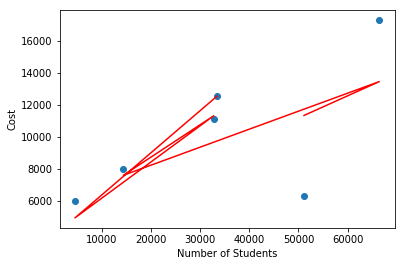

In [43]:
predicted_cost = model_multiple.predict(output[['UCBoolean', 'PercentStem', 'NumStudents']])
plt.scatter(x='NumStudents', y='Cost', data=output)
plt.plot(output['NumStudents'],  predicted_cost, color = 'r')
plt.xlabel("Number of Students")
plt.ylabel("Cost")
;

In [46]:
r = np.var(predicted_cost) / np.var(output['Cost'])
r

0.562002669658649

given the above correlation coefficient, we can see that the predicted vs. actual cost has a moderate positive correlation when using the features UCBoolean, PercentStem and NumStudents.